# Random forest classifier

Used this tutorial:
https://www.datacamp.com/community/tutorials/random-forests-classifier-python#building

In [1]:
import pandas as pd

data = pd.read_csv("kommune_multivariate.csv")
data.head()

,Unnamed: 0,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Fylke_9,Fylke_10,Fylke_11,Fylke_12,Fylke_14,Fylke_15,Fylke_18,Fylke_19,Fylke_20,Fylke_50
0,0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
1,1,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
2,2,7.0,6.0,6.0,6.0,6.0,4.0,5.0,5.999987,6.0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.000000,6.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.000000,5.0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
data.shape

(3359, 150)

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(['Id'],axis=1)

In [4]:
print(data.shape)
data = data.dropna() 
print(data.shape)

(3359, 148)
(3220, 148)


In [5]:
data = data[data.Q16 != 11.0]
data = data[data.Q16 != 12.0]
data = data[data.Q16 != 13.0]

In [6]:
import math
import numpy as np

shuffled = data.iloc[np.random.permutation(len(data))]

test = shuffled[:320] 
train = shuffled[320:]

test_y = test["Q16"]
train_y = train["Q16"]

test_X = test.drop(['Q16'],axis=1).values
train_X = train.drop(['Q16'],axis=1).values

### Create random forest classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5000)

clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)

### Evaluation

In [8]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.365625


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train_X, train_y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.32675439 0.32675439 0.34210526 0.35087719 0.34945055]
0.34 accuracy with a standard deviation of 0.01


      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1.0     51     0    31     0     0     0     0     0     0     0
2.0     12     1    16     0     0     0     1     0     0     0
3.0     37     0    65     0     0     0     0     0     0     0
4.0      9     1     4     0     0     0     0     0     0     0
5.0     10     0     3     0     0     0     0     0     0     0
6.0      8     0     3     0     0     0     0     0     0     0
7.0     16     1     5     0     0     0     0     0     0     0
8.0     15     0     6     0     0     0     0     0     0     0
9.0     11     0     7     0     0     0     0     0     0     0
10.0     4     0     3     0     0     0     0     0     0     0


<Figure size 720x504 with 0 Axes>

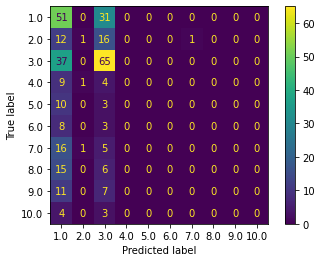

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conmat = confusion_matrix(test_y, y_pred)
val = np.mat(conmat) 

classnames = list(set(train["Q16"]))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

plt.figure(figsize = (10,7))
plot_confusion_matrix(clf,test_X,test_y)
plt.savefig("cm_random_forest.png")

### Calculate feature importance

In [11]:
# Feature importance scores
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(data.drop(['Q16'],axis=1))).sort_values(ascending=False)

for i in range(len(feature_imp)):
    print(str(feature_imp[i]) + "\t" + str(feature_imp.index[i]))

0.020028089502813165	Q9_8
0.019580227725181677	Q61a
0.019149807326372403	Q1_arbeid_kom_3
0.018458607386493513	Q1_samferdsel_kom_4
0.017683890317600558	Q9_5
0.016964823171972482	Q11_1
0.016892685762318015	Q13_1
0.01615479835311695	Q9_6
0.01610822369758921	Q3_5
0.016063894229725862	Q14_1
0.01586164936951208	Q3_4
0.015742559869618894	Q1_samferdsel_kom_5
0.015690953596262602	Q1_arbeid_kom_2
0.015541354205934294	Q9_1
0.015413451046619385	Q3_1
0.015354410183906214	Q9_10
0.014608491155499581	Q1_kultur_kom_1
0.01456066952897913	Q1_natur_kom_2
0.014309328640900404	Q19_2
0.01421687075012992	Q3_3
0.014213305911894871	Q9_9
0.014205103127282077	Q9_2
0.01420076454265331	Q1_samferdsel_kom_3
0.014159234363319995	Q1_samferdsel_kom_1
0.014089112166049451	Q9_11
0.014087880993132535	Q1_kultur_kom_5
0.01407831624583306	Q9_4
0.01404641512822656	Q1_kultur_kom_2
0.014021649902389355	Q1_kultur_kom_4
0.013586231221845387	Kommunestr
0.013579094505252657	Q3_2
0.01350156582698122	Q1_samferdsel_kom_6
0.013439140429

### Visualizing feature importance

No handles with labels found to put in legend.


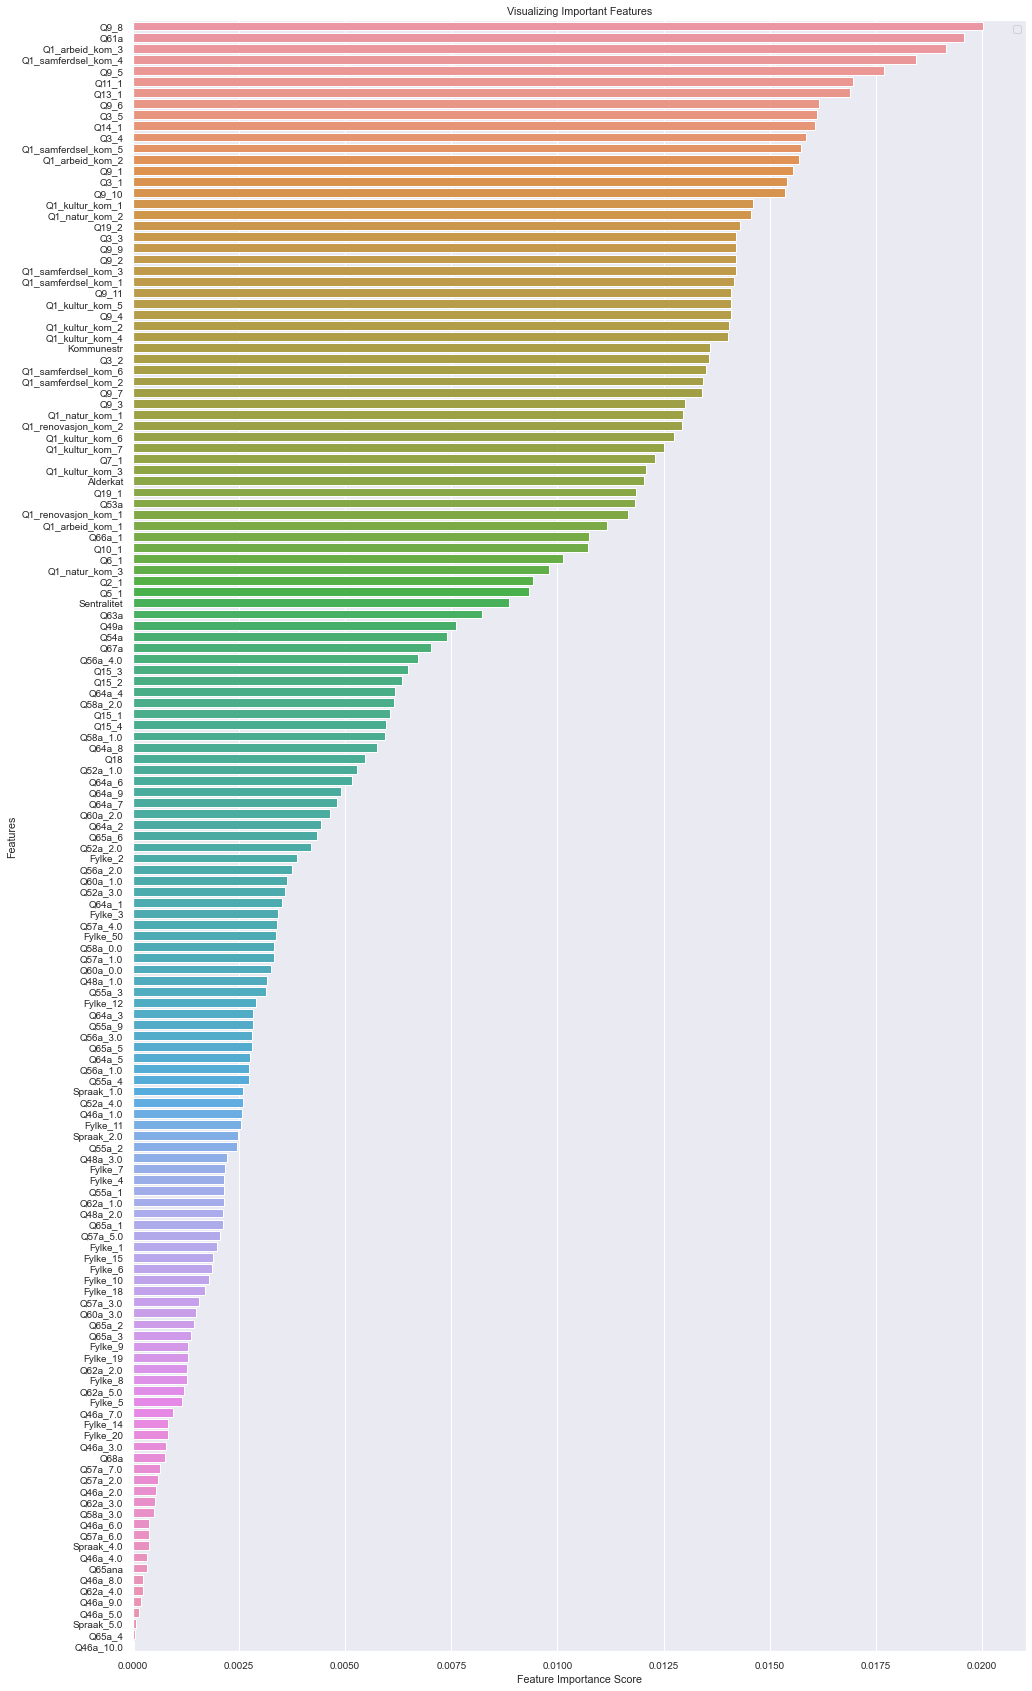

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(16,30)}, font_scale=0.9)

# Creating a bar plot
imp = sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

imp.figure.savefig("forest_importance.png")